Dataset Information

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

1)sepal length in cm

2)sepal width in cm

3)petal length in cm

4)petal width in cm

5)class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

In [44]:
%pip install pandas numpy
import pandas as pd
import numpy as np


Note: you may need to restart the kernel to use updated packages.


In [45]:
%pip install seaborn matplotlib
%pip install scikit-learn
%pip install os


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
Note: you may need to restart the kernel to use updated packages.


In [46]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

DATASET LOADING



In [47]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
df= df.drop(columns='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
#describe stats of data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
#basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [51]:
#to display number of samles on each class
df.Species.value_counts()



Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

PREPROCESSING DATA

In [52]:
#check for null values
df.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Exploratory Data Analysis

<Axes: >

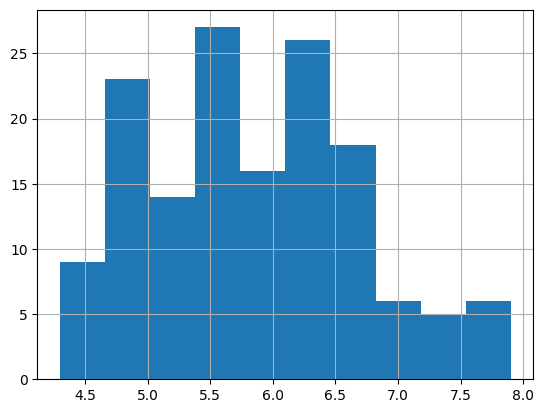

In [53]:
df.SepalLengthCm.hist()



<Axes: >

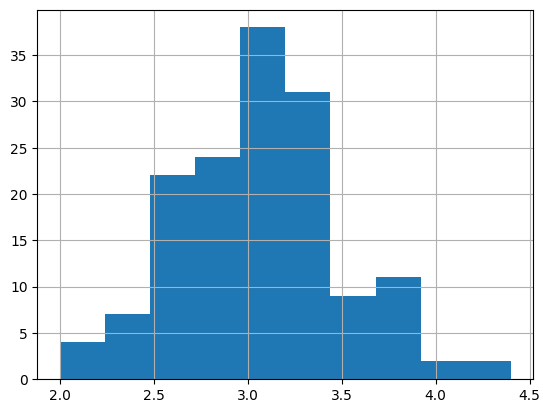

In [54]:
df.SepalWidthCm.hist()


<Axes: >

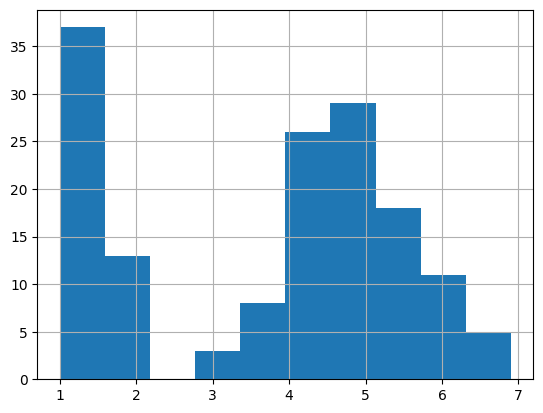

In [55]:
df.PetalLengthCm.hist()


<Axes: >

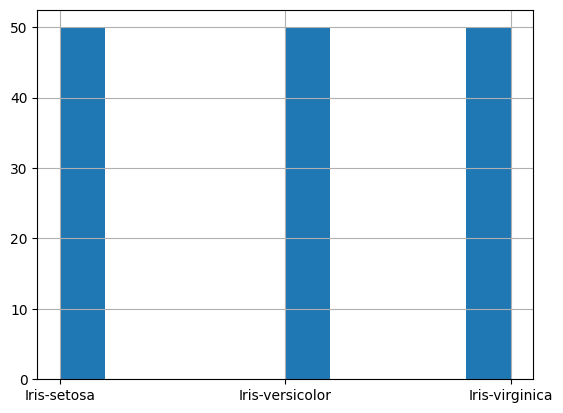

In [56]:
df.Species.hist()

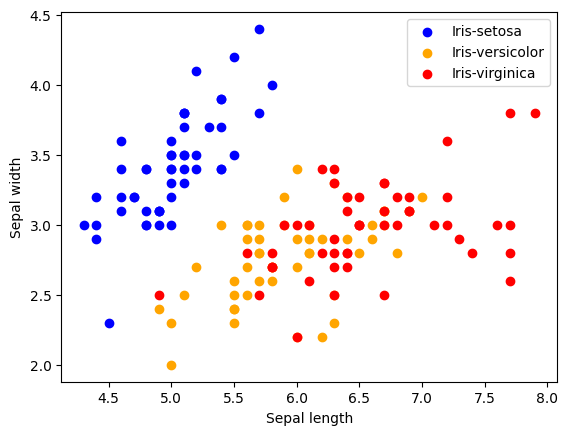

In [57]:
color=['blue','orange','red']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x=df[df.Species==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=color[i],label=species[i])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()

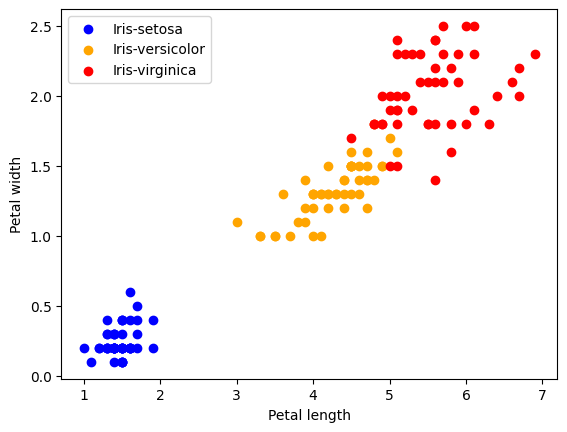

In [58]:
color=['blue','orange','red']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x=df[df.Species==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=color[i],label=species[i])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()

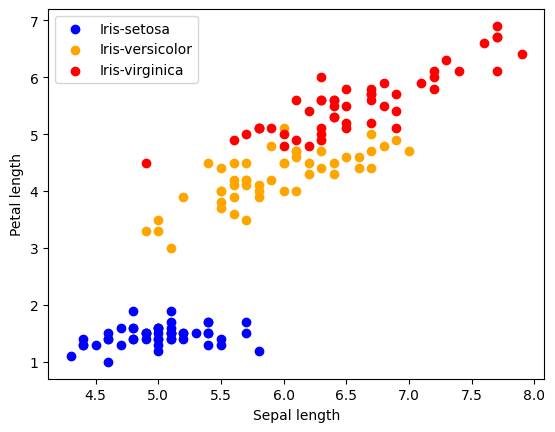

In [59]:
color=['blue','orange','red']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x=df[df.Species==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'],c=color[i],label=species[i])
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend()

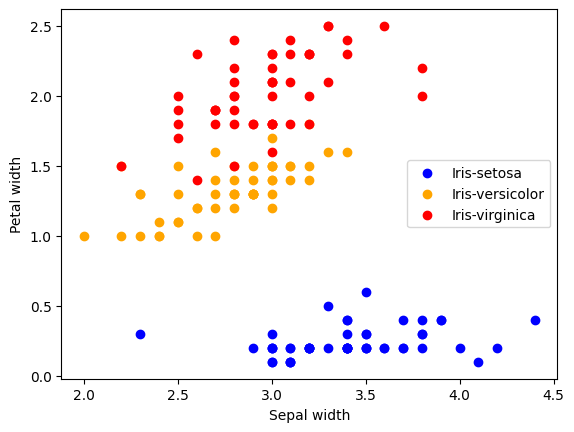

In [60]:
color=['blue','orange','red']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x=df[df.Species==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'],c=color[i],label=species[i])
plt.xlabel("Sepal width")
plt.ylabel("Petal width")
plt.legend()

CORRELATION MATRIX


In [61]:
df1=df.drop(columns='Species')
df1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

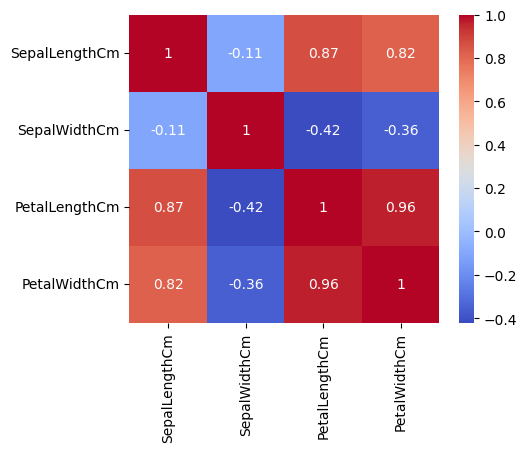

In [62]:
corr=df1.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

LABEL ENCODER

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [64]:
df['Species']=le.fit_transform(df['Species'])
df['Species']
unique_species = df['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1 2]


In [65]:
df.Species.value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

MODEL TRAINING

In [66]:
from sklearn.model_selection import train_test_split
#train->70
#test->30
x=df.drop(columns='Species')
y=df.Species
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [67]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [82]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
def evaluate(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_predict_train=model.predict(x_train)
    y_predict_test=model.predict(x_test)
    cm_train=confusion_matrix(y_train,y_predict_train)
    cm_test=confusion_matrix(y_test,y_predict_test)
    print("\nConfusion Matrix:")
    fig, ax =plt.subplots(1,2,figsize=(11,4))
    sns.heatmap(cm_train,annot=True,ax=ax[0])
    ax[0].set_title("Confusion_matrix for Train data")
    sns.heatmap(cm_test,annot=True,ax=ax[1])
    ax[1].set_title("Confusion_matrix for Test data")
    plt.tight_layout()
    plt.show()
    cr_test=classification_report(y_test,y_predict_test,output_dict=True)
    cr_train=classification_report(y_train,y_predict_train,output_dict=True)
    print(cr_test)
    print(cr_train)
    precision_train= cr_train['weighted avg']['precision']
    precision_test= cr_test['weighted avg']['precision']
    accuracy_train=accuracy_score(y_true=y_train,y_pred=y_predict_train)
    accuracy_test=accuracy_score(y_true=y_test,y_pred=y_predict_test)

    print(f"{precision_test},{precision_train}")
    print(f"{accuracy_test},{accuracy_train}")


# def evaluate(model,x_train,x_test,y_train,y_test):
#     model.fit(x_train,y_train)
#     y_predict_train=model.predict(x_train)
#     y_predict_test=model.predict(x_test)
#     cm_train=confusion_matrix(y_train,y_predict_train)
#     cm_test=confusion_matrix(y_test,y_predict_test)
#     fig, ax=plt.subplot(1,2,figsize=(11,4))
#     sns.heatmap(cm_train,annot=True,ax=ax)
#     sns.heatmap(cm_test,annot=True,ax=ax)
#     plt.tight_layout()
#     plt.show()
#     cr_train=classification_report(y_train,y_predict_train,output_dict=True)
#     cr_test=classification_report()


    



Confusion Matrix:


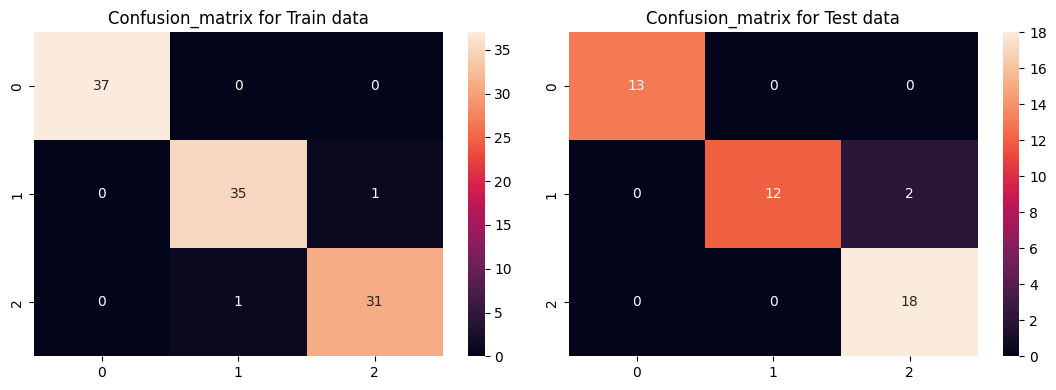

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13.0}, '1': {'precision': 1.0, 'recall': 0.8571428571428571, 'f1-score': 0.9230769230769231, 'support': 14.0}, '2': {'precision': 0.9, 'recall': 1.0, 'f1-score': 0.9473684210526315, 'support': 18.0}, 'accuracy': 0.9555555555555556, 'macro avg': {'precision': 0.9666666666666667, 'recall': 0.9523809523809524, 'f1-score': 0.9568151147098516, 'support': 45.0}, 'weighted avg': {'precision': 0.9600000000000001, 'recall': 0.9555555555555556, 'f1-score': 0.9550157444894286, 'support': 45.0}}
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 37.0}, '1': {'precision': 0.9722222222222222, 'recall': 0.9722222222222222, 'f1-score': 0.9722222222222222, 'support': 36.0}, '2': {'precision': 0.96875, 'recall': 0.96875, 'f1-score': 0.96875, 'support': 32.0}, 'accuracy': 0.9809523809523809, 'macro avg': {'precision': 0.9803240740740741, 'recall': 0.9803240740740741, 'f1-score': 0.9803240740740741, 'support': 105.0}, 'we

In [83]:
#Logistic Regression
lr_model=LogisticRegression(fit_intercept=True)
evaluate(lr_model,x_train,x_test,y_train,y_test)